In [1]:
!pip install gurobipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 4.9 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:

import os
import sys
# path = os.path.dirname(os.getcwd())
# sys.path.insert(0, path)

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/SVR_CG')
from Codes.model import *
from Codes.utils import *

from scipy import stats
import pickle
sys.path.append('/content/gdrive/MyDrive/SVR_Codes/DatasetsResult')
RESULT_DIR = "/content/gdrive/MyDrive/SVR_Codes/DatasetsResult"

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/Datasets')
DATA_DIR = "/content/gdrive/MyDrive/SVR_Codes/Datasets"

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/DatasetsInfo')
DATAINFO_DIR = "/content/gdrive/MyDrive/SVR_Codes/DatasetsInfo"

import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets

from sklearn.preprocessing import StandardScaler



In [4]:

iris = datasets.load_iris()
X = iris.data  
y = iris.target
# df = pd.DataFrame(np.c_[X,y], columns = ['SepalL','SepalW','PetalL', 'PetalW', 'y'])

scaler = StandardScaler()
df_data = scaler.fit_transform(np.c_[X])
df_data = pd.DataFrame(df_data, columns = ['X1','X2','X3', 'Y'])
K = 3
f = 3



In [ ]:
df_data

,X1,X2,X3,Y
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [ ]:

# EM Greedy

weights_list_greedy = []
bias_list_greedy = []
metrics_list = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)
    greedy = CLR(K =K , f = f, max_iter= 30, compute = True, random_state=seed )
    greedy.set_model(Cl_SVR_greedy(Kmeans_init = False, outputFlag=False, tol = 0.05, time = 0.5, step_plots=False))

    greedy.fit(df_data )


    time_list.append(greedy.run_time) 
    epsVal_list.append(greedy.model_optVal)
    weights_list_greedy.append(greedy.weights)
    bias_list_greedy.append(greedy.bias)


print("\n\nResults for EM Greedy" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_greedy = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for EM Greedy: ", epsVal_result_greedy)


time_result_greedy = np.mean(time_list)
print("Average time taken for EM Greedy ", time_result_greedy, "\n")

Clusterwise-Regression model with SVR - Greedy algorithm
# of outliers:  0
Iteration:  0
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 30
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 30
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeL

In [ ]:

# KM LR Greedy

weights_list_kmlr = []
bias_list_kmlr = []
metrics_list = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)
    print(seed)
    kmlr = CLR(K =K , f = f, random_state=seed )
    kmlr.set_model(km_lr())
    kmlr.fit(df_data )

    time_list.append(kmlr.run_time) 
    epsVal_list.append(kmlr.model_optVal)
    weights_list_kmlr.append(kmlr.weights)
    bias_list_kmlr.append(kmlr.bias)


print("\n\nResults for kmlr" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmlr = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for Kmlr ", epsVal_result_kmlr)


time_result_kmlr = np.mean(time_list)
print("Average time taken for Kmlr ", time_result_kmlr, "\n")

208
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.8004831741556309
185
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.8004831741556309
128
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.8004831741556309
170
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.8004831741556309
42
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.8004831741556309
31
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.8004831741556309
23
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.8004831741556309
114
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.8004831741556309
78
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.8004831741556309
113
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.8

In [ ]:

# KM SVR Greedy

weights_list_kmsvr = []
bias_list_kmsvr = []
metrics_list = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)
    print(seed)
    kmsvr = CLR(K =K , f = f, random_state=seed )
    kmsvr.set_model(km_svr(epsilon = 0.4))
    kmsvr.fit(df_data )

    time_list.append(kmsvr.run_time) 
    epsVal_list.append(kmsvr.model_optVal)
    weights_list_kmsvr.append(kmsvr.weights)
    bias_list_kmsvr.append(kmsvr.bias)


print("\n\nResults for kmsvr" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmsvr = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmsvr ", epsVal_result_kmsvr)


time_result_kmsvr = np.mean(time_list)
print("Average time taken for kmsvr ", time_result_kmsvr, "\n")

145
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  0.9350003840537378
169
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  0.9350003840537378
22
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  0.9350003840537378
141
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  0.9350003840537378
228
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  0.9350003840537378
195
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  0.9350003840537378
90
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  0.9350003840537378
29
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  0.9350003840537378
232
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  0.9350003840537378
221
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
Max

In [5]:

# KM et Greedy

weights_list_kmet = []
bias_list_kmet = []
metrics_list = []
time_list=[]
epsVal_list = []


for j in range(10):
    seed = np.random.randint(2**8)
    print(seed)
    kmet = CLR(K =K , f = f, compute = True, random_state=seed )
    kmet.set_model(km_et(outputFlag= False))
    kmet.fit(df_data )

    time_list.append(kmet.run_time) 
    epsVal_list.append(kmet.model_optVal)
    weights_list_kmet.append(kmet.weights)
    bias_list_kmet.append(kmet.bias)


print("\n\nResults for kmet" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmet = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmet ", epsVal_result_kmet)


time_result_kmet = np.mean(time_list)
print("Average time taken for kmet ", time_result_kmet, "\n")




with open(os.path.join(RESULT_DIR, 'Iris3.pkl'), 'wb') as outp:

    pickle.dump(weights_list_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmet, outp, pickle.HIGHEST_PROTOCOL)



167
Clusterwise-Regression model with Kmeans-et
# of outliers:  0
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set pa

In [6]:


with open(os.path.join(RESULT_DIR, 'Iris3.pkl'), 'wb') as outp:

    pickle.dump(weights_list_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmet, outp, pickle.HIGHEST_PROTOCOL)



In [ ]:

# kplane Greedy

weights_list_kp = []
bias_list_kp = []
metrics_list = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)

    kp = CLR(K =K , f = f, max_iter= 20, random_state=seed )
    kp.set_model(k_plane())
    kp.fit(df_data )

    time_list.append(kp.run_time) 
    epsVal_list.append(kp.model_optVal)
    weights_list_kp.append(kp.weights)
    bias_list_kp.append(kp.bias)


print("\n\nResults for k plane" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kp = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for k plane: ", epsVal_result_kp)


time_result_kp = np.mean(time_list)
print("Average time taken for k plane ", time_result_kp, "\n")

Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.5116468415582431
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.4464858866892823
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.4942989694733566
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.4956049092195299
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.45943517924461347
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.4920224809426624
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.415805090995129
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.49447242100730815
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.5108928246570088
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.5082949519767848


Results for k pla

In [ ]:

# Clusterwise SVR with constraint generation 

optcg = CLR(K =K , f = f, max_iter= 20, compute = True, random_state=123)
optcg.set_model(Cl_SVR_Cg(outputFlag=False, initConstrCnt=12, optimalGap= 0.05, tol = 0.1, time = 2, initConstrIntRatio= 4, outliersCnt = 0, step_plots=False))

optcg.fit(df_data )


weights_optcg = optcg.weights
bias_optcg = optcg.bias
optgap_optcg = optcg.model_optGap
optVal_optcg = optcg.model_optVal


print("\n\nResults for CG" )

print("EpsVal for CG: ", optVal_optcg)

time_result_optcg = optcg.run_time
print("Time taken for CG ", time_result_optcg, "\n")


Clusterwise-Regression model with SVR - Constraint generation
# of outliers:  0
greedy objective:  0.08625044624271726
greedy objective:  0.08366442369585564
greedy objective:  0.16651398214074983
greedy objective:  0.17163273276848567
greedy objective kmlr:  0.17338121486758085
Max error for warm starting model:  0.5347978113576985
Number of WS constraints:  45
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-0.20709489  0.00868393  1.04520069]
 [-0.08254874  0.15262909  1.18049841]
 [ 0.11746909  0.10160175  0.86872909]]
b at WS:  [[-0.12109078]
 [ 0.23131007]
 [-0.1605303 ]]
Set parameter TimeLimit to value 120
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w:  [[-0.22950188  0.22317189  1.32019618]
 [-0.22850188  0.15605429  1.40442542]
 [-0.14288339  

Clusterwise-Regression model with SVR - MILP
# of outliers:  0
greedy objective:  0.07709256855458944
greedy objective:  0.08201824882354855
greedy objective:  0.17381129628730263
greedy objective:  0.177181372751828
greedy objective kmlr:  0.17338121486758085
Max error for warm starting model:  0.4786130336441548
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-0.26431928  0.12543883  1.27693287]
 [-0.18835469  0.09646694  1.25608618]
 [-0.15868094  0.05874911  1.05616684]]
b at WS:  [[ 0.00662471]
 [ 0.30651394]
 [-0.25179559]]
Set parameter TimeLimit to value 600
Set parameter MIPGap to value 0.1
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
E:  0.23265528780251782


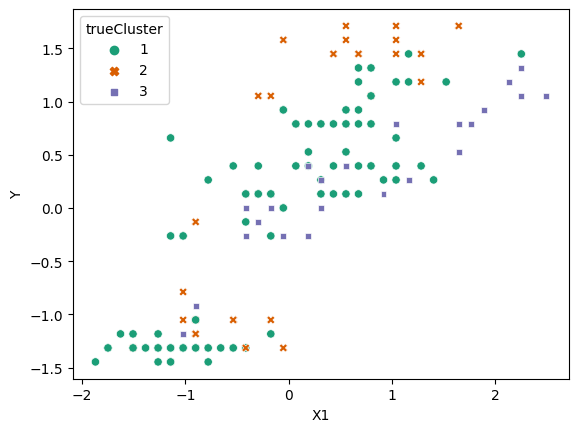

Solution reached with Cost:  0.23265528780251782


Results for full MILP
EpsVal for full MILP:  0.23265528780251782
Time taken for full MILP  600.2444466259999 



In [ ]:

# Clusterwise SVR with full MILP

optmilp = CLR(K =K , f = f,compute = True, random_state=243)
optmilp.set_model(Cl_SVR_milp(outputFlag=False, WarmStart=True, optimalGap= 0.1, time = 10))

optmilp.fit(df_data )

weights_optmilp = optmilp.weights
bias_optmilp = optmilp.bias
optgap_optmilp= optmilp.model_optGap
optVal_optmilp = optmilp.model_optVal


print("\n\nResults for full MILP" )

print("EpsVal for full MILP: ", optVal_optmilp)

time_result_optmilp = optmilp.run_time
print("Time taken for full MILP ", time_result_optmilp, "\n")


Clusterwise-Regression model with SVR - MILP
# of outliers:  0
greedy objective kmlr:  0.17338121486758085
Best WS is kmlr
Max error for warm starting model:  0.8004831741556309
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-0.38612588  0.19561017  1.2302409 ]
 [-0.22986129  0.08922872  1.1109409 ]
 [ 0.02876552  0.03324546  0.42270023]]
b at WS:  [[ 0.19075162]
 [-0.0266112 ]
 [-0.70682389]]
Set parameter TimeLimit to value 840
Set parameter MIPGap to value 0.1
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
E:  0.2356010661358492


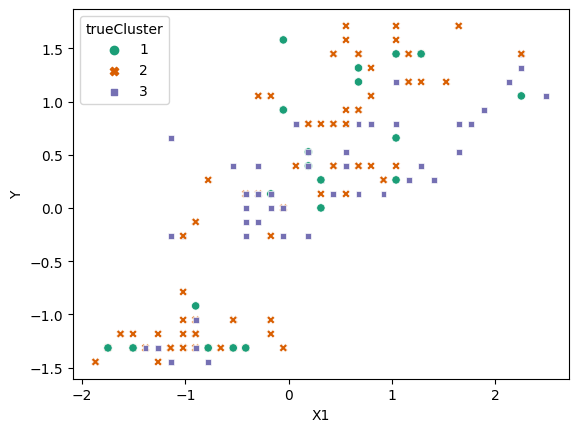

Solution reached with Cost:  0.2356010661358492


Results for full MILP
EpsVal for full MILP:  0.2356010661358492
Time taken for full MILP  840.24352103 



In [ ]:

# Clusterwise SVR with full MILP (time of cg)
time_result_optcg = 840
optmilp = CLR(K =K , f = f,compute = True, random_state=243)
optmilp.set_model(Cl_SVR_milp(outputFlag=False, WarmStart=True, optimalGap= 0.1, time = time_result_optcg/60))

optmilp.fit(df_data )

weights_optmilp = optmilp.weights
bias_optmilp = optmilp.bias
optgap_optmilp= optmilp.model_optGap
optVal_optmilp = optmilp.model_optVal


print("\n\nResults for full MILP" )

print("EpsVal for full MILP: ", optVal_optmilp)

time_result_optmilp = optmilp.run_time
print("Time taken for full MILP ", time_result_optmilp, "\n")


In [ ]:


with open(os.path.join(RESULT_DIR, 'Iris2.pkl'), 'wb') as outp:

    pickle.dump(weights_list_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmsvr, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optmilp, outp, pickle.HIGHEST_PROTOCOL)


In [ ]:

# Save the final results 


with open(os.path.join(RESULT_DIR, 'Iris.pkl'), 'wb') as outp:



    pickle.dump(weights_list_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_greedy, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_list_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    
    pickle.dump(weights_list_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kp, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optcg, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optmilp, outp, pickle.HIGHEST_PROTOCOL)



n, d = X.shape

with open(os.path.join(DATAINFO_DIR, 'Iris.pkl'), 'wb') as outp:

    pickle.dump(n, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(d, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(K, outp, pickle.HIGHEST_PROTOCOL)

